In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import MultipleLocator

In [2]:
df = pd.read_csv('shortestdist_credit_combined_chem.csv')
df0 = pd.read_csv('shortestdist_credit_combined_chem.csv')
df0.head(3)

,ave_distance,ave_credit,sum_credit,mentee_temp,target,elite,elite_surpass
0,4.131190,2.350076,25.850835,A100066398,0,0,0
1,3.084548,2.254615,220.952238,A1002422011,1,0,0
2,2.502730,1.687917,135.033400,A1002422011,1,0,0


In [3]:
def darken_color(color, factor):
    r, g, b, a = mcolors.to_rgba(color)
    r = max(0, min(255, r * factor))
    g = max(0, min(255, g * factor))
    b = max(0, min(255, b * factor))
    return (r, g, b, a)

In [4]:
elite_data_inset = df[df['elite'] == 1]
non_elite_data_inset = df[df['elite'] == 0]

7768


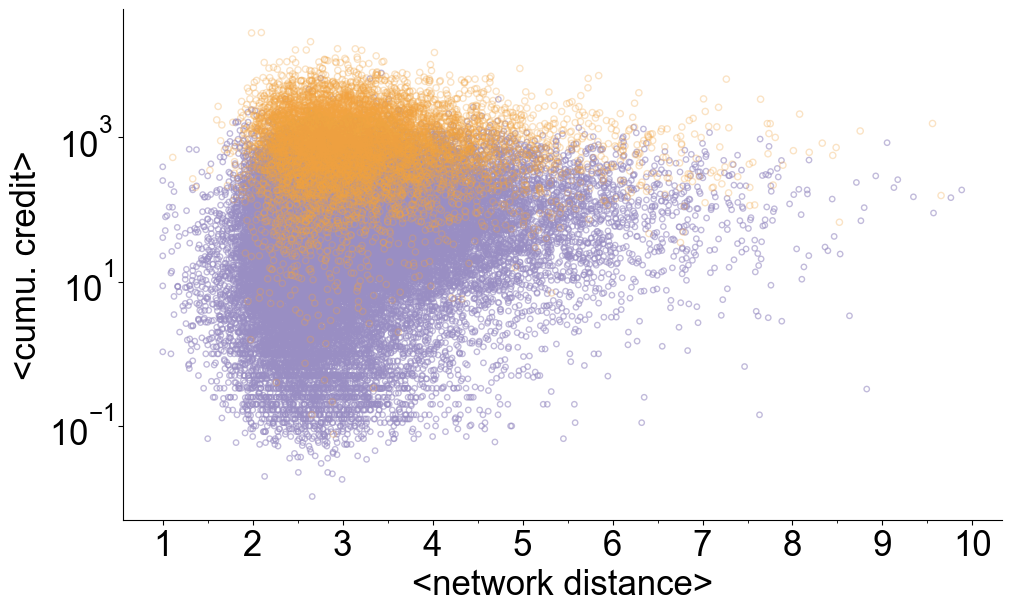

In [5]:
fig, ax = plt.subplots(figsize=(10,6),constrained_layout=True)
sns.set(style='ticks',font_scale=1.2, font='Arial')
df0 = df0[df0['ave_distance'] <= 10]

#non-elite
non_elite_data_inset = df0[df0['elite'] == 0]
ax.scatter(non_elite_data_inset["ave_distance"],
           non_elite_data_inset['sum_credit'],
           alpha=0.6,
           facecolor='none',
           # color=darken_color("#998ec3", 0.98),
           s=15,
           edgecolor="#998ec3",
           label='non-Elite')

#elite
elite_data_inset = df0[df0['elite'] == 1]
print(len(elite_data_inset))
ax.scatter(elite_data_inset["ave_distance"],
           elite_data_inset['sum_credit'],
           alpha=0.3,
           facecolor='none', 
           edgecolor="#f1a340", 
           label='Elite',
           s=20)##ff7f00


ax.set_yscale('log')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.xlabel('<network distance>',fontsize=25)
plt.ylabel('<cumu. credit>',fontsize=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.legend(frameon=0)
# fig.savefig('scatter.png',dpi=200)

In [6]:
# 删除异常值
indices_to_drop = df[(df['ave_distance'] >= 1) &
                                (df['ave_distance'] <= 2) &
                                (df['sum_credit'] > 600)].index
df = df.drop(indices_to_drop)
df =df[df["ave_distance"]<=6]

/var/folders/8n/d3_ymw7s7tn0tz9t554ghv5m0000gn/T/ipykernel_58658/1079464203.py:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


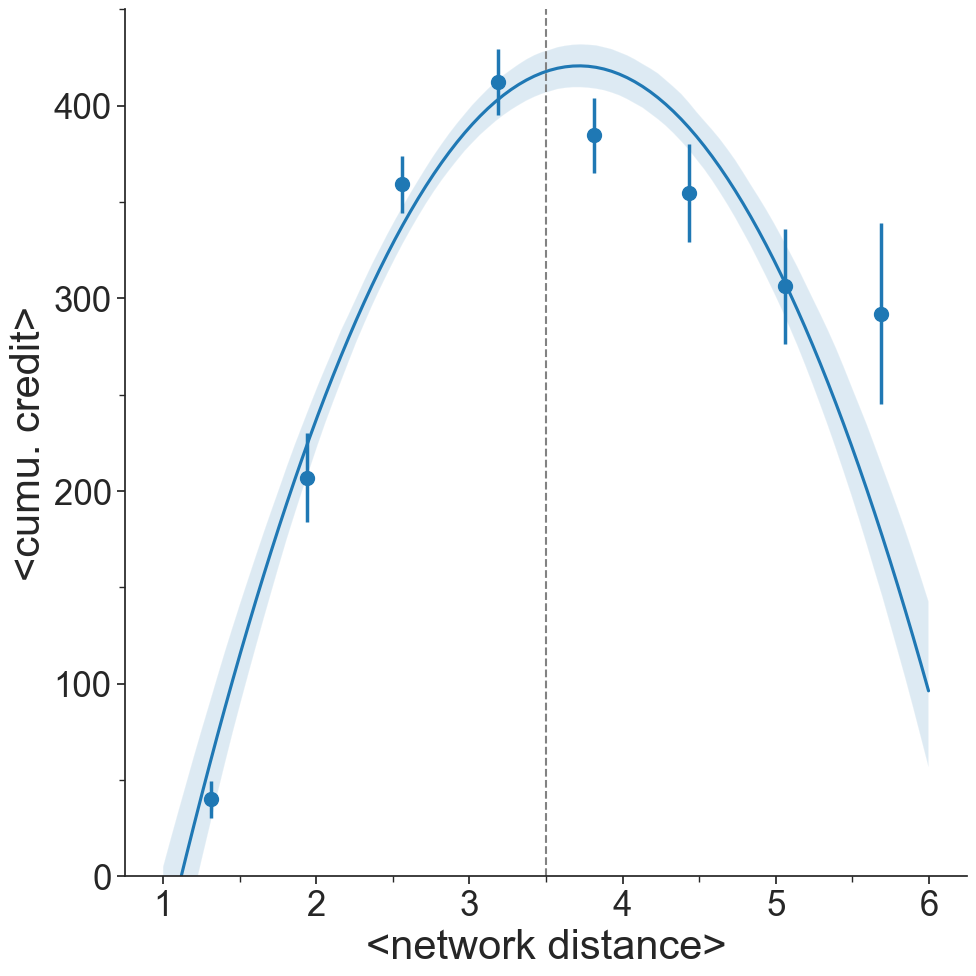

In [7]:
fig, ax = plt.subplots(figsize=(10,10),constrained_layout=True)
sns.set(style='ticks',font_scale=1.2, font='Arial')

# errorbar
bin_interval = (df["ave_distance"].max() - df["ave_distance"].min()) /8
bins = np.arange(min(df["ave_distance"]), max(df["ave_distance"]) + bin_interval, bin_interval)
df['group'] = pd.cut(df["ave_distance"], bins, include_lowest=True, right=False)

grouped = df.groupby('group')['sum_credit']
mean_values = grouped.mean()
std_error = grouped.std() / np.sqrt(grouped.count()) * 1.96

for (group, mean), error in zip(mean_values.items(), std_error):
    mid_point = (group.left + group.right) / 2
    ax.errorbar(mid_point, mean, yerr=error, fmt='o',color='#1f78b4', ecolor='#1f78b4', elinewidth=2.5, capsize=0, markersize=10)


# curve fitting
sns.regplot(x='ave_distance', y='sum_credit', data=df, scatter=False, color='#1f78b4', order=2)
plt.xlabel('<network distance>',fontsize=30)
plt.ylabel('<cumu. credit>',fontsize=30)
plt.tick_params(axis='x',labelsize=25)
plt.tick_params(axis='y',labelsize=25)
plt.yticks(np.arange(0 , 450, 100))
plt.ylim([0,450])
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))

ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axvline(3.5, color='#828282', linewidth=1.5, linestyle='--')
# plt.savefig('regression_distance.pdf')
# plt.savefig('regression_distance.png',dpi=200)
plt.tight_layout()
plt.show()